## Setup

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

In [3]:
# setting up QC thresholds
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

In [4]:
#Inputs
data_dir = os.path.join('../data/')
os.listdir(data_dir)

['.DS_Store',
 'counts.csv',
 'genomes',
 'log_tpm.csv',
 'log_tpm_qc.csv',
 'metadata',
 'metadata_qc.csv',
 'multiqc_report.html',
 'multiqc_stats.tsv']

In [5]:
#incorporating metadata file
metadata_file = "../data/metadata/Acinetobacter_baumannii_curated_CC1.tsv" 

In [6]:
#load expression data
DF_log_tpm = pd.read_csv(path.join(data_dir,'../data/log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 3895
Number of samples: 105


In [7]:
DF_log_tpm.head()

,Abaum_0001,Abaum_0002,Abaum_0003,Abaum_0004,Abaum_0005,Abaum_0006,Abaum_0007,Abaum_0008,Abaum_0009,Abaum_0010,...,SRX8696868,SRX8696869,SRX8696870,SRX8696871,SRX8944518,SRX8944519,SRX8944520,SRX8944521,SRX8944522,SRX8944523
Geneid,,,,,,,,,,,,,,,,,,,,,
ABUW_6001,6.162303,6.057743,6.193528,6.024322,5.797486,6.854015,6.651171,6.358583,6.520595,6.593531,...,0.000000,7.406851,0.000000,12.401953,6.776037,6.552667,6.657699,6.360825,6.931410,6.751474
ABUW_6002,7.077112,7.042338,7.911574,7.229813,7.301443,7.133781,6.642640,7.391063,8.003876,7.839017,...,9.827701,0.000000,0.000000,0.000000,7.651910,7.622662,7.515105,7.235058,7.583577,7.606817
ABUW_6003,7.628470,8.627994,8.970377,8.356422,7.983963,9.083200,8.724565,8.839581,8.973797,9.548375,...,0.000000,9.629881,0.000000,0.000000,9.288922,9.121292,9.099894,8.907943,9.381870,9.550582
ABUW_5001,7.533777,7.713697,7.991543,8.270640,8.860830,8.552435,8.084747,7.642735,7.823923,7.798745,...,0.000000,7.718901,8.481509,0.000000,7.291484,6.692227,6.846400,6.500495,6.972963,7.428247
ABUW_5002,6.744877,6.967491,6.596592,7.103911,7.335995,7.476638,7.367345,6.993174,6.693917,6.813406,...,0.000000,0.000000,0.000000,0.000000,8.197311,7.544219,7.415181,7.432351,7.856735,8.259655


In [8]:
#Load QC data
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 107


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Abaum_0001,6167079.0,4403847.0,330375.0,192365.0,0.0,0.0,0.0,0.0,352417.0,0.0,...,6172690,314807190,169667,311892133,0.925982,0.1598,0.8402,0.0,0.0,0.0
Abaum_0002,5730887.0,3956479.0,332288.0,233606.0,0.0,0.0,0.0,0.0,406844.0,0.0,...,5735887,292530237,155954,289832810,0.922102,0.1319,0.8681,0.0,0.0,0.0
Abaum_0003,6071002.0,4420932.0,45340.0,221182.0,0.0,0.0,0.0,0.0,322476.0,0.0,...,6075776,309864576,182657,306949424,0.940783,0.1465,0.8535,0.0,0.0,0.0
Abaum_0004,5664805.0,4094918.0,116138.0,157106.0,0.0,0.0,0.0,0.0,317658.0,0.0,...,5669326,289135626,163691,286404708,0.944511,0.2957,0.7043,0.0,0.0,0.0
Abaum_0005,5583850.0,4054363.0,11765.0,145353.0,0.0,0.0,0.0,0.0,258047.0,0.0,...,5588013,284988663,158880,282292257,0.946145,0.3194,0.6806,0.0,0.0,0.0


In [10]:
#Load metadata
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 107


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,aerobicity,supplement,temperature,pH,growth_phase,OD,additional_notes,notes,Title,Condition
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX1464764,3/30/16 17:09,1116234.0,Acinetobacter baumannii AB5075,470.0,1236.0,1116234.0,Acinetobacter baumannii,SINGLE,ION_TORRENT,Ion Torrent PGM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX1928979,9/29/16 16:56,470.0,Acinetobacter baumannii,470.0,1236.0,470.0,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX2568047,2/22/17 4:08,470.0,Acinetobacter baumannii,470.0,1236.0,470.0,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX2568048,2/22/17 4:08,470.0,Acinetobacter baumannii,470.0,1236.0,470.0,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX2568049,2/22/17 4:08,470.0,Acinetobacter baumannii,470.0,1236.0,470.0,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Remove extra sample rows
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

## Check statistics 

In [13]:
#FastQC stats
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

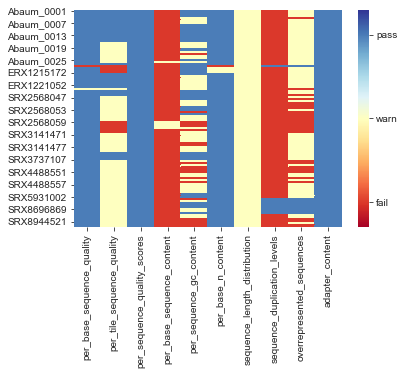

In [14]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

In [15]:
#If a sample does not pass any of these four categories, discard the sample
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [16]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ERX1215169,fail,pass,fail,pass
ERX1215170,pass,pass,warn,pass
ERX1215171,pass,pass,warn,pass
ERX1215172,pass,pass,warn,pass
SRX1464764,warn,pass,pass,pass


In [17]:
#mark samples as failed
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

In [18]:
#The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

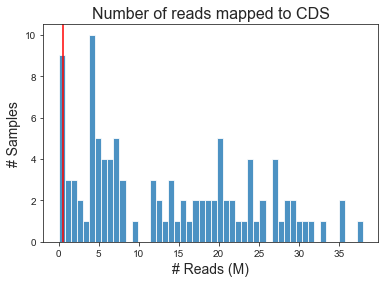

In [19]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

In [20]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX8696864,2089808.0,47.0,6.0,2085786.0,0.0,0.0,0.0,0.0,48.0,0.0,...,2100532,288251916,520906,286413872,0.637652,0.0,1.0,0.0,0.0,0.0
SRX8696871,2703472.0,125.0,1.0,2697479.0,0.0,0.0,0.0,0.0,74.0,0.0,...,2714850,376967091,734934,374736266,0.591782,0.0,1.0,0.0,0.0,0.0
SRX8696865,1814795.0,3484.0,27.0,1810838.0,0.0,0.0,0.0,0.0,33.0,0.0,...,1820144,256954408,537301,255778008,0.457824,0.0,0.0,0.0,0.0,0.0
SRX8696869,2114821.0,3632.0,172.0,2110486.0,0.0,0.0,0.0,0.0,69.0,0.0,...,2124003,291317155,569627,289510243,0.620256,1.0,0.0,0.0,0.0,0.0
SRX8696868,2371869.0,4014.0,130.0,2367072.0,0.0,0.0,0.0,0.0,77.0,0.0,...,2383998,324518012,664217,322296604,0.684525,1.0,0.0,0.0,0.0,0.0
SRX8696866,2341245.0,4346.0,212.0,2336102.0,0.0,0.0,0.0,0.0,57.0,0.0,...,2349904,325156264,787001,323422005,0.533362,0.6,0.4,0.0,0.0,0.0
SRX8696870,2210363.0,4482.0,25.0,2205203.0,0.0,0.0,0.0,0.0,78.0,0.0,...,2221187,300812977,642286,298614635,0.730800,0.0,0.0,0.0,0.0,0.0
SRX8696867,2682600.0,5102.0,11.0,2676674.0,0.0,0.0,0.0,0.0,52.0,0.0,...,2694653,371863792,766009,369607269,0.606814,1.0,0.0,0.0,0.0,0.0


In [21]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

## Examine Global Correlations 

In [22]:
#Hierarchical Clustering

import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  4


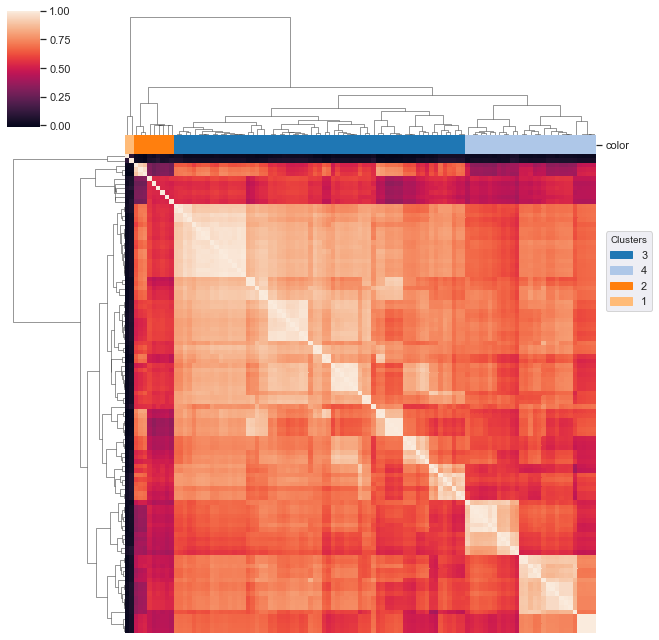

In [23]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

In [24]:
#remove cluster 1?
remove_clst = [1]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [25]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [26]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,pH,growth_phase,OD,additional_notes,notes,Title,Condition,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
Abaum_0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Abaum_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Abaum_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Abaum_0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
Abaum_0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True


## Remove failed samples

In [27]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [28]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

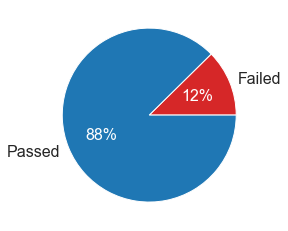

In [29]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

## Metadata curation 

In [30]:
#BioProject counts of passing metadata
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA375077    18
PRJNA483526    12
PRJNA658638    10
PRJNA400082     9
PRJNA545412     6
PRJNA657043     6
PRJEB11825      6
PRJNA435672     4
PRJNA328520     3
PRJEB11774      2
Name: BioProject, dtype: int64

In [31]:
#BioProject counts of all metadata
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA375077    18
PRJNA483526    12
PRJNA658638    10
PRJNA400082     9
PRJNA645064     8
PRJNA545412     6
PRJEB11774      6
PRJNA657043     6
PRJEB11825      6
PRJNA435672     4
PRJNA328520     3
PRJNA305130     1
Name: BioProject, dtype: int64

## Correlation between replicates

First, get a full sample name

In [32]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [33]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score


Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped.

In [34]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [35]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [36]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.96


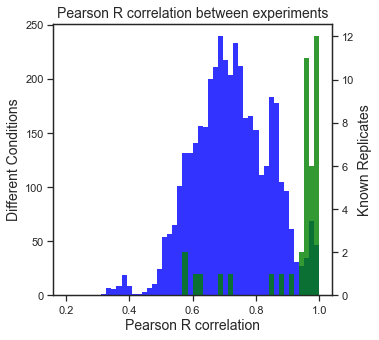

In [37]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [38]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [39]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['planktonic', 'ciprofloxacin-exposed biofilm'], dtype='object')

In [40]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [41]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

## Remove failed samples

In [42]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [43]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [44]:
DF_metadata_final.shape

(83, 56)

In [45]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [46]:
DF_log_tpm_final.to_csv(os.path.join(data_dir,'log_tpm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(data_dir,'metadata_qc.csv'))